<a href="https://colab.research.google.com/github/audrey-fontana/audrey-fontana/blob/main/Analise_Dados_Aluguel_Apartamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXERCÍCIO DE TRATAMENTO E ANÁLISE DE DADOS:

Contexto: base de dados contendo informações sobre aluguel de apartamentos

Objetivo: escolher um apartamento para alugar nas seguintes condições: valor até $4.000, que aceite animais e, que tenha entre 2 e 3 quartos.

Nota1: dentre os apartamentos que atendam aos requisitos, escolher o aluguel mais barato em andares mais altos.

Nota2: analisar o custo total dos apartamentos entre as cidades.

In [ ]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns

In [ ]:
# Importando o banco de dados

aluguel_casa = pd.read_excel("/content/houses_rent.xlsx")

# Visualizando os 10 primeiros valores do banco de dados

aluguel_casa.head(10)

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200,42,28,2270
6,6,Barcelona,55,1,1,1,2,accept,furnished,1950,5000,375,64,7389
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300,67,17,1984
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000,109,26,2963
9,9,Barcelona,32,1,1,1,16,accept,not furnished,533,2900,0,37,3470


In [ ]:
# Visualizando os 10 últimos valores do banco de dados

aluguel_casa.tail(10)

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6070,6070,Barcelona,200,4,5,3,2,accept,not furnished,2600,4500,834,58,7992
6071,6071,Porto,600,5,5,4,-,accept,not furnished,3300,5000,916,76,9292
6072,6072,Barcelona,200,4,4,4,21,accept,furnished,2000,10000,862,127,12990
6073,6073,Barcelona,88,2,2,1,1,accept,not furnished,1200,6000,0,77,7277
6074,6074,Porto,28,1,1,0,-,not accept,furnished,0,1390,0,18,1408
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


In [ ]:
# Renomeando as colunas

aluguel_casa = aluguel_casa.rename(columns ={'parking spaces':'parking_spaces', 'rent amount':'rent_amount', 'property tax':'property_tax', 'fire insurance':'fire_insurance'})
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
# Verificando o tipo dos dados

aluguel_casa.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


Observe que as colunas de: 'area', 'rent_amount', 'property_tax', 'fire_insurance' e 'total' podem possuir valores não inteiros, portanto é necessário mudar o tipo de dado de 'int64' para 'float'


In [ ]:
# Alterando o tipo de dados

aluguel_casa = aluguel_casa.astype({'area': 'float', 'rent_amount':'float', 'property_tax':'float', 'fire_insurance':'float', 'total':'float'})
aluguel_casa.dtypes

,0
index,int64
city,object
area,float64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [ ]:
# Verificando a quantidade de dados e a presença de valores nulos

aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   float64
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 665.1+ KB


Observe que o banco de dados possui 6.080 linhas de dados e não há nenhum valor nulo.

In [ ]:
# Verificando algumas métricas das colunas de interesse

aluguel_casa[['area', 'rooms','bathroom', 'parking_spaces', 'rent_amount', 'property_tax', 'fire_insurance', 'total' ]].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


Observe o comportamento das médias e do desvio padrão para cada coluna de dados.
O desvio padrão da área e do valor total é alto, o que indica que há muitos dados que variam longe do valor da média global do dado.
Ainda, os valores de percentis é uma boa métrica de análise para verificar o comportamento de cada parâmetro.

In [ ]:
# Iniciando os filtros
# Filtrar os dados com o valor total de até $4.000

aluguel_casa = aluguel_casa[(aluguel_casa['total'] <= 4000)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64.0,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19.0,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0
5,5,Barcelona,13.0,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0


In [ ]:
#Filtrar os dados de animal = accept

aluguel_casa = aluguel_casa[(aluguel_casa['total'] <= 4000) & (aluguel_casa['animal'] == 'accept')]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64.0,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13.0,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82.0,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


Observe que os filtros que utilizando a interjeição "E" devem ser separadas pelo símbolo "&" e, para sinalizar uma igualdade, deve ser considerado "==".

In [ ]:
# Outra maneira de filtrar os dados é utilizando a função "query", conforme abaixo

aluguel_casa = aluguel_casa.query("total <= 4000 and animal == 'accept'")
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64.0,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13.0,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82.0,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


Nesse caso, utilizando a função .query, deve-se ter o cuidado de utilizar corretamente aspas simples e duplas.

In [ ]:
# Filtrando os dados de quartos iguais a 2 ou 3

aluguel_casa = aluguel_casa[(aluguel_casa['total']<=4000) & (aluguel_casa['animal']=='accept') & (aluguel_casa['rooms']==2)|(aluguel_casa['rooms']==3)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64.0,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82.0,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56.0,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


Observe que os filtros que utilizando a interjeição "OU" devem ser separadas pelo símbolo "|".

In [ ]:
# Realizando os mesmo filtros utilizando a função query

aluguel_casa = aluguel_casa.query(("total <= 4000 and animal == 'accept' and rooms == 2 or rooms ==3"))
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64.0,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82.0,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56.0,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
# Verificando as métricas das colunas de interesse após os filtros

aluguel_casa[['area', 'rooms','bathroom', 'parking_spaces', 'total' ]].describe()

,area,rooms,bathroom,parking_spaces,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,100.432836,2.379531,1.653873,1.212509,2556.358209
std,340.999109,0.485443,0.745034,0.973862,783.028975
min,30.000000,2.000000,1.000000,0.000000,843.000000
25%,60.000000,2.000000,1.000000,1.000000,1962.500000
50%,76.000000,2.000000,2.000000,1.000000,2507.000000
75%,100.000000,3.000000,2.000000,2.000000,3181.500000
max,12732.000000,3.000000,6.000000,8.000000,3998.000000


Observe que a variável "aluguel_casa" é uma nova planilha com os filtros aplicados, diferente da planilha original, mesmo que tenham o mesmo nome.
Isso ocorre pois sempre que aplicamos os filtros, subscrevemos os dados na mesma variável.
Para isso não ocorrer, deve-se nomear a variável com os filtros aplicados com um nome diferente dá original.

Observe que o valor máximo da coluna 'total' é de $4.000; o valor mínimo da coluna 'rooms' é 2 e, o valor máximo é 3. Isso indica que os filtros foram aplicados corretamente.


In [ ]:
# Agrupando os dados: média dos valores totais por cidade

agg_city_price = aluguel_casa.groupby(["city"])["total"].agg("mean").reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


Criou-se uma nova variável que contem os dados agrupados.

A função .agg é a que puxa a agregação.

A função .reset_index organiza a vizualização dos dados.

In [ ]:
# Agregando mais de um dado ao mesmo tempo: média dos valores totais, considerando número de quartos e banheiros

agg_bath_room_price = aluguel_casa.groupby(['bathroom', 'rooms'])['total'].agg('mean').reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


Realizando análises gráficas utilizando a biblioteca 'seaborn'

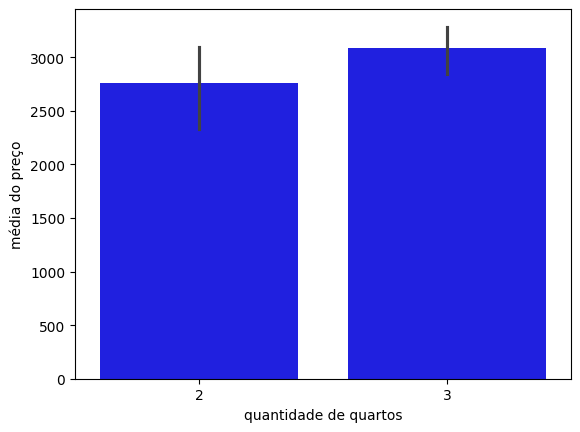

In [ ]:
#Criando um gráfico de barras: eixo x = quantidade de quartos e, eixo y = valor total

ax = sns.barplot(data = agg_bath_room_price, x = 'rooms', y = 'total', color = 'blue');

#Renomeando as legendas dos eixos
ax.set(xlabel = "quantidade de quartos", ylabel = "média do preço");

Observe a variação do valor do aluguel quando comparado imóveis com 2 ou 3 quartos.

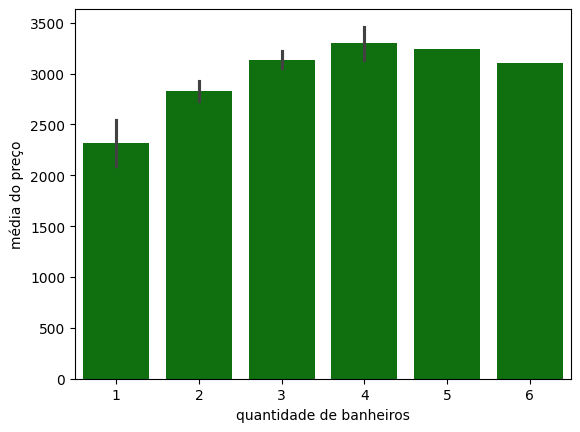

In [ ]:
# Criando um gráfico de barras: eixo x = média de preço e, eixo y = quantidade de banheiros

ax = sns.barplot(data = agg_bath_room_price, x = 'bathroom', y = 'total', color = 'green');

# Renomeando as legendas dos eixos
ax.set(xlabel = "quantidade de banheiros", ylabel = "média do preço");

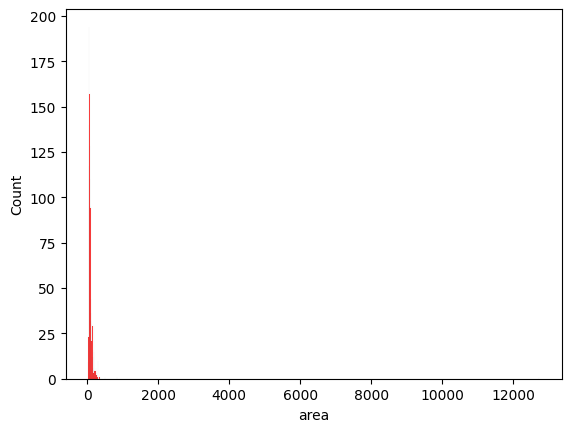

In [ ]:
# Agrupando os dados pela área do imóvel
agg_area = aluguel_casa[['area']]

# Criando um histograma com os dados de área
sns.histplot(data = agg_area, x = 'area', color = 'red');

Perceba que os dados não estão bem distribuídos, pois existe um grande desvio pardrão para esse parâmetro.

Para corrigir isso, vamos excluir os dados do último quartil, para diminuir o desvio padrão e observamos uma melhor distribuição dos dados.

Perceba que os dados do último quartil para a variável 'area' terminam em área igual a 100

In [ ]:
# Removendo os dados do último quartil, para verificar a influência no desvio padrão
agg_area = agg_area.query("area <=100")
agg_area.describe()

,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


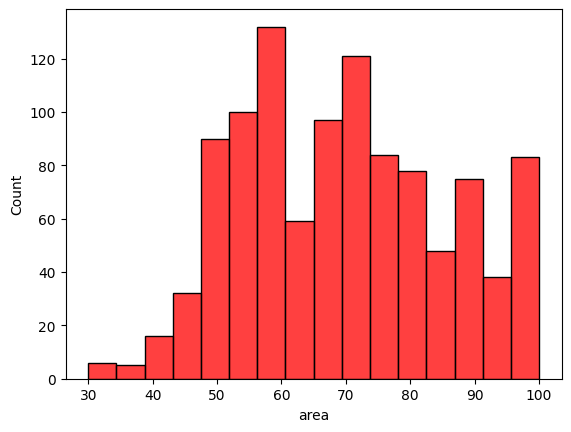

In [ ]:
# Criando um histograma com os novos dados

sns.histplot(data = agg_area, x = 'area', color = 'red');

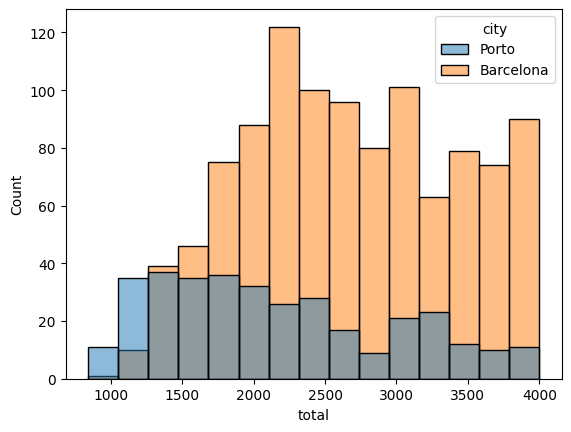

In [ ]:
# Criando um histograma de comparação dos valores entre as cidades

sns.histplot(data = aluguel_casa, x = 'total', hue = 'city');

Pelo gráfico acima, observamos que os alugueis da cidade do Porto são consideravelmente mais baratos do que os de Barcelona.

Desse modo, vamos filtrar apenas os imóveis da cidade do Porto.

In [ ]:
# Filtrando os imóveis da cidade do Porto

aluguel_casa = aluguel_casa.query("city == 'Porto'")
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64.0,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56.0,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188.0,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150.0,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94.0,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


Vamos analisar os imóveis pelo andar de cada um. Lembrando que o objetivo é escolher o apartamento mais barato dentro das condições impostas e, adicionalmente, em andares mais altos.

Desse modo, vamos observar a distribuição dos imóveis agrupados por andar.

In [ ]:
# Agrupando os imóveis por andar, do maior andar para o menor andar

aluguel_casa.groupby("floor").index.nunique().sort_values(ascending = False)

,index
floor,
-,77
1,52
3,51
2,31
4,26
7,20
5,16
6,13
11,11


A função index.nunique retorna o número de valores únicos dentro das especificações descritas.

Nesse caso, realizou a contagem de quantos imóveis disponíveis tem em cada andar.

In [ ]:
# Agrupando os dados por andar e valor médio

agg_floor_price = aluguel_casa.groupby("floor")["total"].agg("mean").reset_index()
agg_floor_price

,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


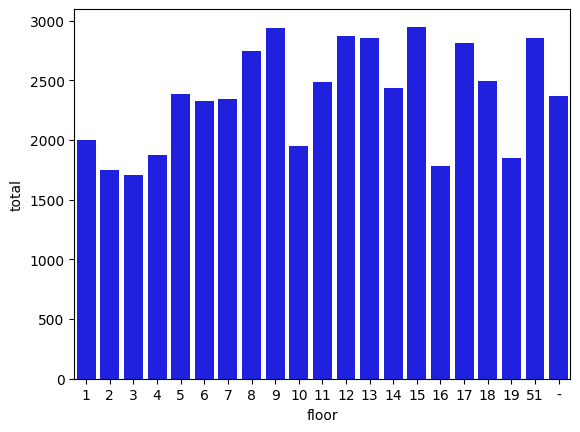

In [ ]:
# Criando um gráfico de barras com as informações agrupadas

sns.barplot(data = agg_floor_price, x = "floor", y = "total", color = "blue");

Ao observar o gráfico, é possível identificar que o andar 16 possui o menor valor de aluguel dentre os andares mais altos.

In [ ]:
# Aplicando um filtro para selecionar apenas os imóveis do andar 16

andar = aluguel_casa.query("floor == 16")
andar.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100.0,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72.0,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0


Ao analisar os dois imóveis que possuem todas as características desejadas, podemos apresentar para o cliente as melhores opções de alugueis.

Ambos possuem 2 quartos, aceitam animais e o valor do aluguel é menor do que $4.000. Desse modo, fica a critério do cliente escolher qual das duas opções irá alugar.

O cliente pode considerar a metragem do impóvel x o valor total a ser pago ou, por exemplo, se dejesa que o imóvel tenha vaga de garagem disponível.
